## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

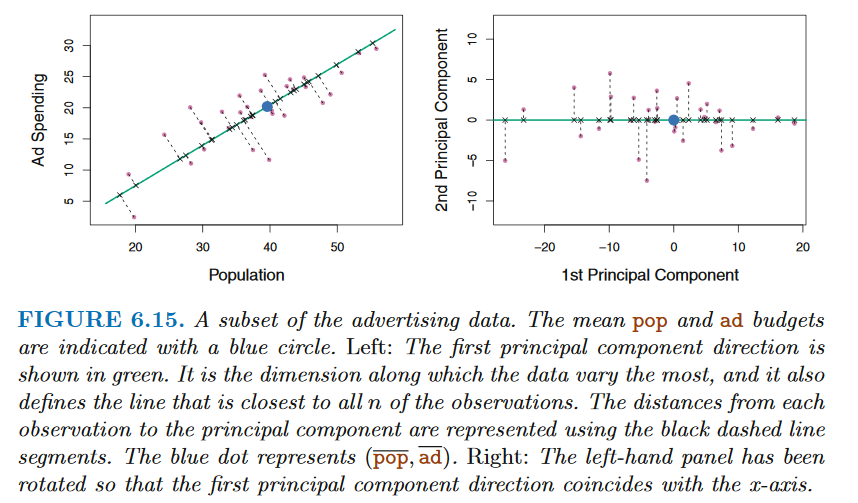

In [51]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


#### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

De esta manera se pueden construir las proyecciones de los datos $X$ en cada una de las $d$ componentes principales como:

$$z_{i1} = w_{11} x_{i1} + w_{12} x_{i2} + \cdots w_{1d} x_{id}$$
$$z_{i2} = w_{21} x_{i1} + w_{22} x_{i2} + \cdots w_{2d} x_{id}$$
$$\vdots$$
$$z_{id} = w_{d1} x_{i1} + w_{d2} x_{i2} + \cdots w_{dd} x_{id}$$

para $i=1,\cdots,n$

donde $$w_j = (w_{j1},\cdots,w_{jd}), \qquad j=1,\cdots,d$$

es el j-ésimo vector propio de la matriz de varianza empírica de $X$

de manera que $$Z_j = w_{j1} X_1 + w_{j2} X_2 + \cdots w_{jd} X_d$$ 

es la proyección de los datos en la $j-$ésima componenente principal, y se cumple que:

$$\hat{\sigma}^2(Z_1) \geq \hat{\sigma}^2(Z_2) \geq \cdots \geq \hat{\sigma}^2(Z_d)$$

#### Ejercicio 2:
Muestre que $S$, la varianza empírica total de los datos $X$ cumple:
$$S \equiv  \sum_{j=1}^d \hat{\sigma}^2(X_j) = \sum_{j=1}^d \hat{\sigma}^2(Z_j)$$

###### Indicación:
Utilice la propiedad de la descomposición de una matriz $A$ en valores y vectores propios que establece que la traza de $A$ es igual a la suma de sus valores propios.

#### Selección del número de componentes principales
La propiedad anterior genera un criterio para decidir el número de componentes principales a considerar en función del porcentaje de varianza explicada. En efecto, la proporción de varianza explicada (PVE) por la m-ésima componente principal se puede calcular como:
$$PVE = \frac{\hat{\sigma}^2(Z_m)}{\sum_{j=1}^d \hat{\sigma}^2(X_j)}= \frac{ \sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{ \sum_{j=1}^d \sum_{i=1}^n{x_{ij}}^2}$$

De la demostración previa se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [52]:
data("USArrests")
head(USArrests, 10)


,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


### Análisis Exploratorio de Datos

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

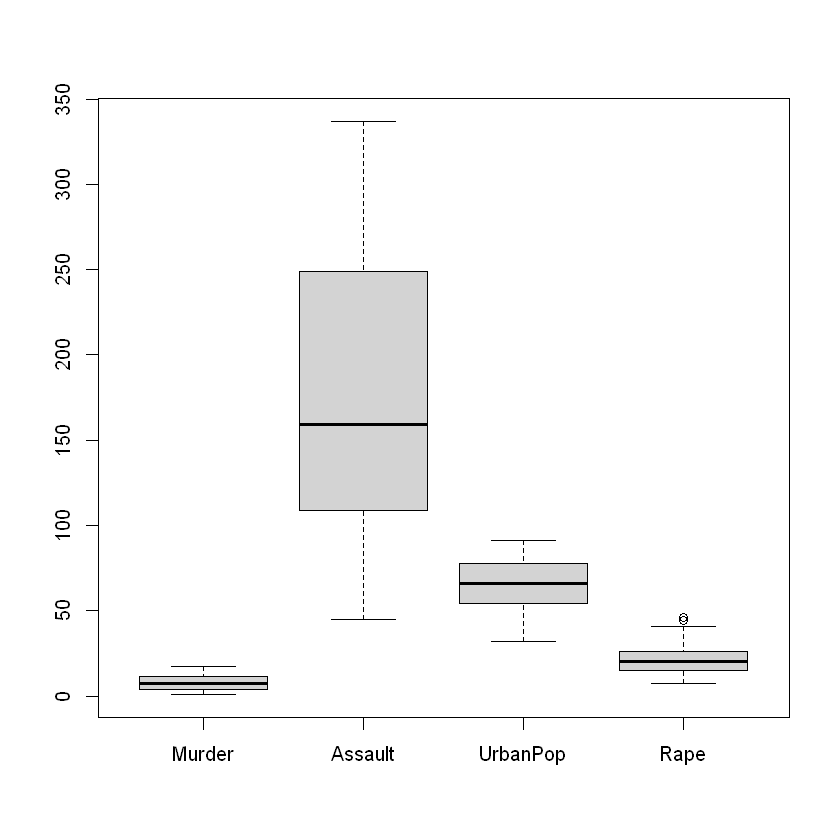

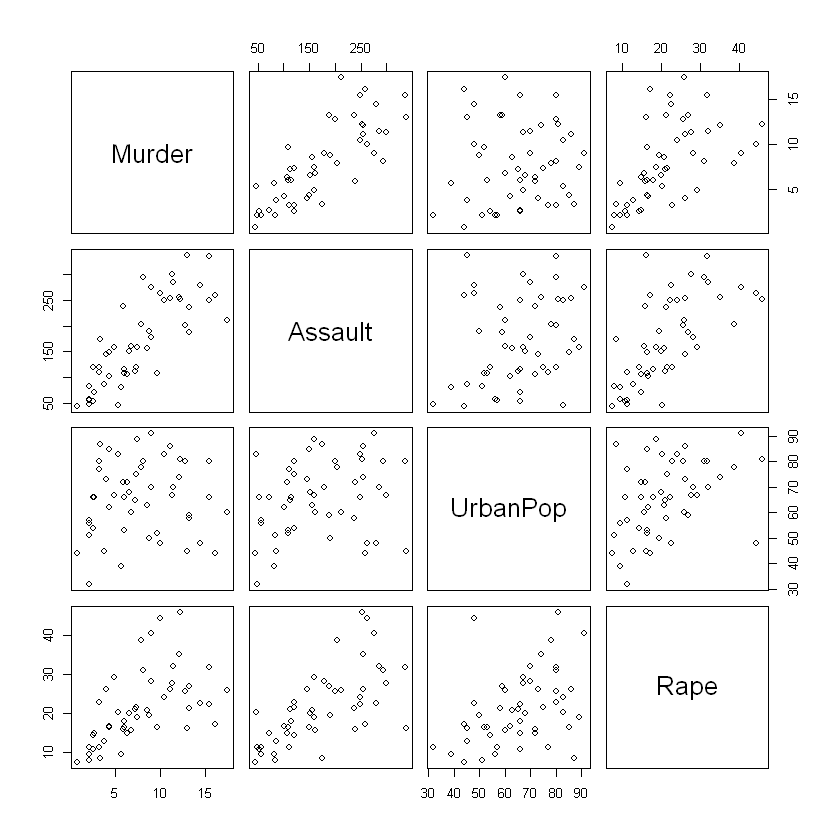

             Murder   Assault   UrbanPop      Rape
Murder   1.00000000 0.8018733 0.06957262 0.5635788
Assault  0.80187331 1.0000000 0.25887170 0.6652412
UrbanPop 0.06957262 0.2588717 1.00000000 0.4113412
Rape     0.56357883 0.6652412 0.41134124 1.0000000


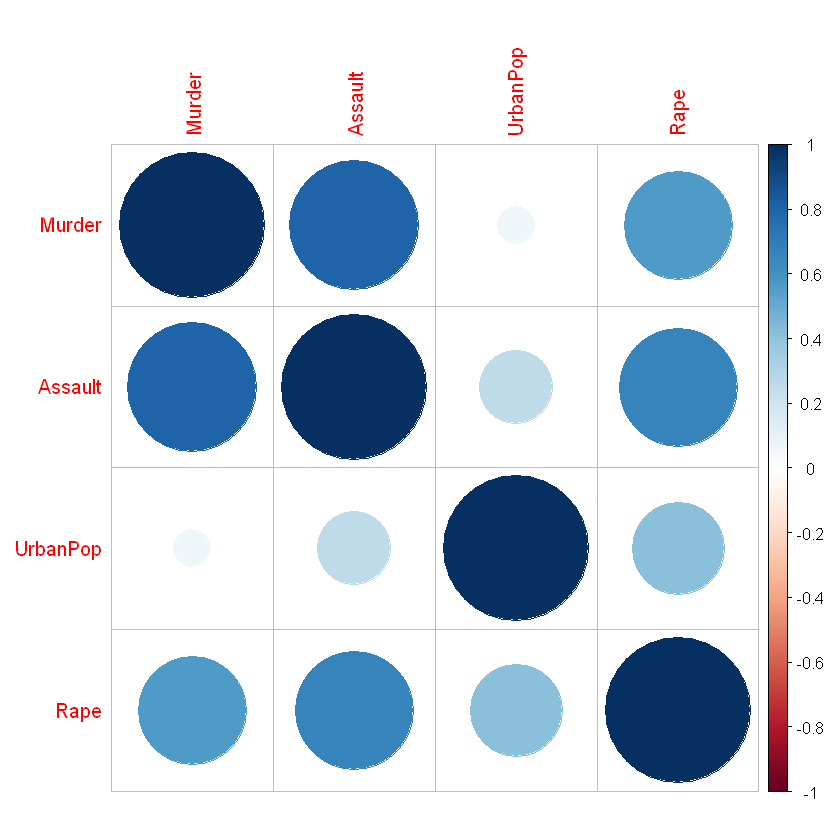

In [53]:
#install.packages('corrplot')
library(corrplot)

# cada variable
summary(USArrests)
boxplot(USArrests)

#relaciones entre variables
plot(USArrests)
mcor<-cor(USArrests)
corrplot(mcor)
print(mcor)



In [54]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests,2,mean)



Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

In [55]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)

apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, si las escalas son comparables, el escalado puede no ser deseable, como se muestra en el ejemplo siguiente:


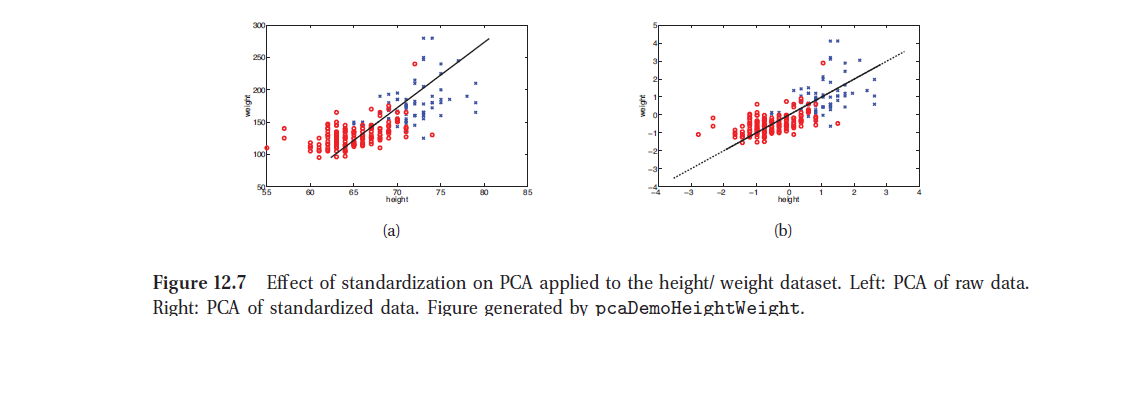

In [56]:
display_png(file="figura2.png")

En el caso de los datos en análisis, las variables Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, es decir se encuentran en la misma escala, no asi UrbanPop que se mide como un porcentaje de la población total. Y es por esto que hemos decidido escalar los datos.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA  dependerán de si las variables se han escalado individualmente o no.

In [57]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [58]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [59]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<chr>,<dbl>,<dbl>
1,Alabama,0.9756604,-1.1220012
2,Alaska,1.9305379,-1.0624269
3,Arizona,1.7454429,0.7384595
4,Arkansas,-0.1399989,-1.1085423
5,California,2.4986128,1.5274267
6,Colorado,1.4993407,0.9776297


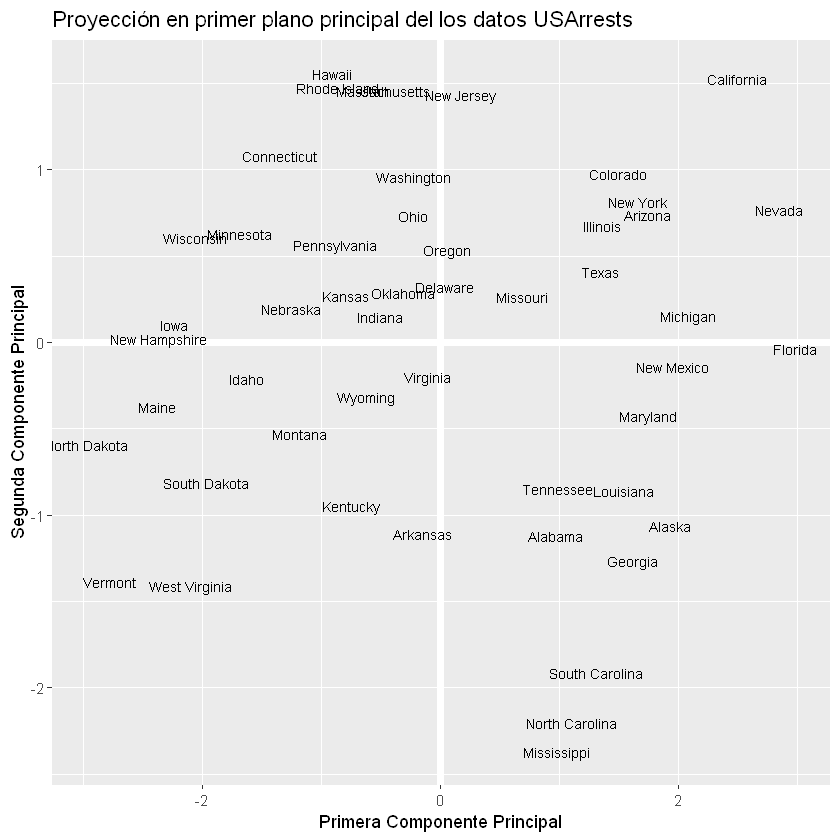

In [60]:
#install.packages('ggplot2')
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

In [61]:
#Cálculo de la varianza explicada
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

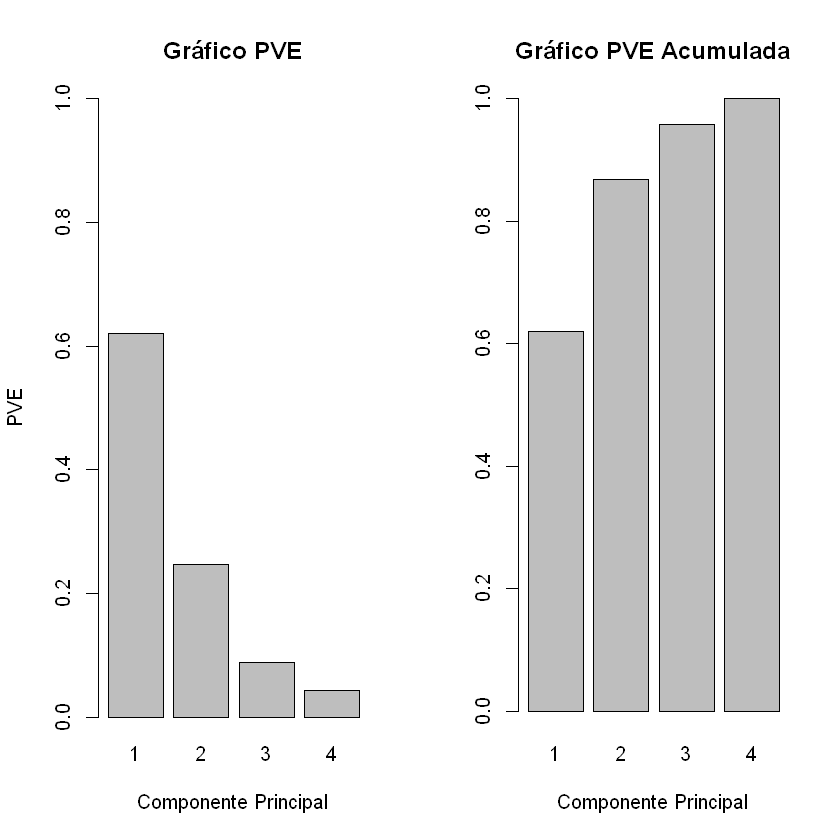

In [62]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [63]:
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

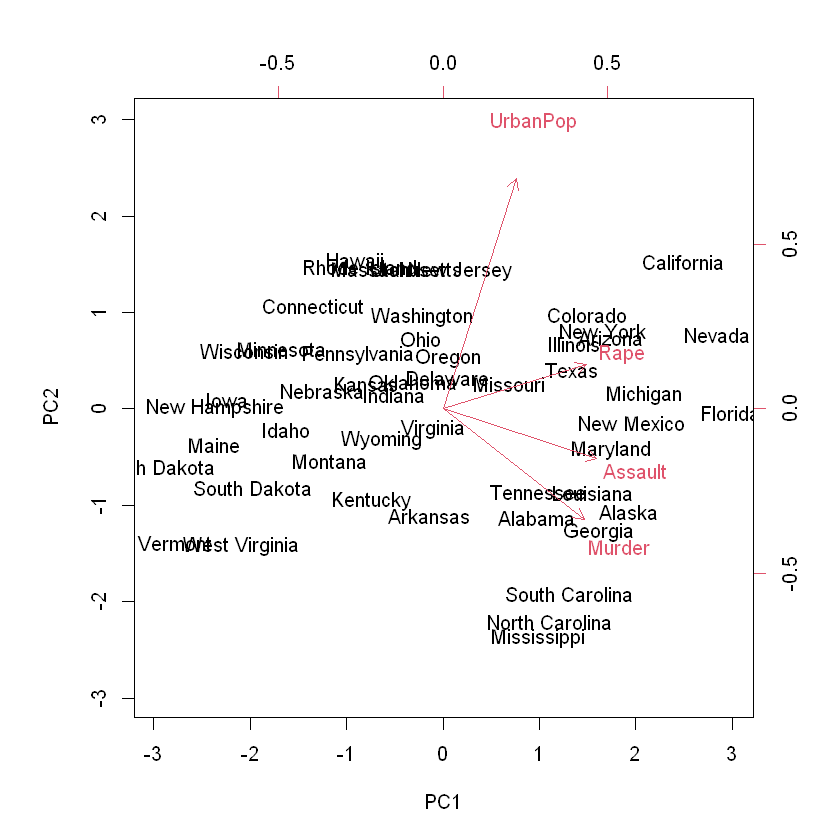

In [64]:
biplot(pca_res, scale = 0)

#### Ejercicio 3:
1. Explique como se obtienen las coordenadas de  variables y observaciones en este último gráfico y como se interpreta la representación obtenida.
2. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 
3. Utilice la función predefinida en R princomp y compare con prcomp.


#### - Respuesta 3.1

El último gráfico es generado a partir de un análisis de PCA aplicado al conjunto de datos USArrests, esto a partir del comando prcomp en R. Este comando entrega los siguientes elementos de salida:

1. pca_res\$sdev: Presenta las desviaciones estandar de los componentes principales.
2. pca_res\$rotation: Matriz que contiene los vectores propios de la matriz de covarianza.
3. pca_res\$center: Medias utilizadas para centrar las variables.
4. pca_res\$scale: Desviaciones estandar.
5. pca_res\$x: Nuevas coordenadas de variables, contiene las proyecciones de los datos originales en el nuevo sistema de coordenadas.

En cuanto a la interpretación del gráfico tenemos que las observaciones o estados si están cercanos, tienen perfiles similares en cuanto a arrestos, por ejemplo, Alabama y Georgia están más agrupados, lo que sugiere patrones similares de criminalidad.
En los ejes, el eje PC1, es la dirección que explica la mayor varianza de los datos. El eje PC2, es ortogonal a PC1 y explica la segunda mayor parte de la varianza.
Las flechas, estas indican que la variable contribuye significativamente a la varianza explicada por los primeros componentes y la dirección de la flecha indica la correlación positiva con ese componente. Por ejemplo, con Murder y Assault estan en direcciones similares, con lo cual están fuertemente correlacionadas. En cuanto a los estados y su relación con la flecha, si un estado proyectado en la dirección de una flecha, por ejemplo Georgia hacia Murder, indica que ese estado tiene un valor alto en esa variable. Si un estado está en la dirección opuesta a una flecha, tiene valores bajos en esa variable.


### - Respuesta 3.2
Comparación de resutados

In [65]:
prcomp(USArrests, scale=TRUE)

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

In [66]:
arrests.eigen

eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


Tanto como la función prcomp y los valores calculados anteriormente y guardados en `arrest.eigen`, dan los mismos valores. Además, prcomp entrega información de la desviación estandar, mientras que en los calculos previos se puede calcular de la siguiente manera:

c(sqrt(2.4802416), sqrt(0.9897652), sqrt(0.3565632), sqrt(0.1734301))

Los componentes que se van a comparar de prcomp con los resultados anteriormente calculados, son los componentes anteriormente explicados:

1. pca_res\$sdev
2. pca_res\$rotation
3. pca_res\$center
4. pca_res\$scale
5. pca_res\$x

Con lo cual, se va a comparar: 

1. Valores propios
2. Vectores propios
3. Proyecciones de los datos
4. Varianza explicada

Para comparar los valores propios, se tiene que verificar que `pca_res$sdev^2` coincidan con `arrests.eigen\$values`

In [67]:
arrests.eigen$values
pca_res$sdev^2


[1] 2.4802416 0.9897652 0.3565632 0.1734301

[1] 2.4802416 0.9897652 0.3565632 0.1734301

Al comparar `pca_res$sdev^2` con los valores propios obtenidos manualmente en `arrests.eigen$values`, se observa que coinciden, lo que confirma que ambos metodos explican la misma cantidad de varinza por componente principal

Para comparar los vectores propios, se tiene que verificar que coincidad `pca_res$rotation` con `arrests.eigen$vectors`

In [68]:
arrests.eigen$vector
pca_res$rotation

-0.5358995,0.4181809,-0.3412327,0.64922780
-0.5831836,0.1879856,-0.2681484,-0.74340748
-0.2781909,-0.8728062,-0.3780158,0.13387773
-0.5434321,-0.1673186,0.8177779,0.08902432


,PC1,PC2,PC3,PC4
Murder,0.5358995,-0.4181809,0.3412327,-0.64922780
Assault,0.5831836,-0.1879856,0.2681484,0.74340748
UrbanPop,0.2781909,0.8728062,0.3780158,-0.13387773
Rape,0.5434321,0.1673186,-0.8177779,-0.08902432


Los vectores propios entregados por `pca_res$rotation` coinciden con los obtenidos manualmente en `arrests.eigen$vectors`, salvo por un cambio de signo en PC1, pero esto no tiene efecto en la interpretación del PCA, ya que los vectores propios representan direcciones en el espacio, y una dirección no cambia si se invierte el signo.

Para comparar las proyecciones de los datos, se tiene que cumplir que coincidad pca_res\$x[,1:2] con PC1 y PC2 calculados anteriormente. Para eso se van a juntar ambos en una misma matriz, para hacer más facil la comparación, dando asi PC1_manual y PC2_manual, como los valores calculados anteriormente

In [69]:
comparacion <- data.frame(
  Estado = rownames(USArrests),
  PC1_manual = PC1,
  PC1_prcomp = pca_res$x[,1],
  PC2_manual = PC2,
  PC2_prcomp = pca_res$x[,2]
)

View(comparacion)

,Estado,PC1_manual,PC1_prcomp,PC2_manual,PC2_prcomp
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,Alabama,0.97566045,0.97566045,-1.12200121,-1.12200121
Alaska,Alaska,1.93053788,1.93053788,-1.06242692,-1.06242692
Arizona,Arizona,1.74544285,1.74544285,0.73845954,0.73845954
Arkansas,Arkansas,-0.13999894,-0.13999894,-1.10854226,-1.10854226
California,California,2.49861285,2.49861285,1.52742672,1.52742672
Colorado,Colorado,1.49934074,1.49934074,0.97762966,0.97762966
Connecticut,Connecticut,-1.34499236,-1.34499236,1.07798362,1.07798362
Delaware,Delaware,0.04722981,0.04722981,0.32208890,0.32208890
Florida,Florida,2.98275967,2.98275967,-0.03883425,-0.03883425


Las proyecciones de las observaciones `pca_res$x` sobre las componentes principales coinciden con las calculadas anteiormente, confirmando que la transformación al nuevo espacio fue realizada correctamente.

Para calcular la varianza explicada se va a hacer la siguiente comparación:

In [70]:
round((pca_res$sdev^2 / sum(pca_res$sdev^2)), 2)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

[1] 0.62 0.25 0.09 0.04

Las PVE calculadas en la casilla anterior coinciden, validando la consistencia entre ambos enfoques.

### - Respuesta 3.3

A continuación se van a comparar los resultados de princomp y prcomp

In [71]:
pca_prcomp = prcomp(USArrests, scale = TRUE)
pca_princomp = princomp(USArrests, cor = TRUE)

View(pca_prcomp)
print("--------------------------------------------------")
View(pca_princomp)

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

[1] "--------------------------------------------------"


Call:
princomp(x = USArrests, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.5748783 0.9948694 0.5971291 0.4164494 

 4  variables and  50 observations.

In [72]:
pca_prcomp$sdev
pca_princomp$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Comp.1    Comp.2    Comp.3    Comp.4 
1.5748783 0.9948694 0.5971291 0.4164494

Se aprecia que ambas funciones estan capturando la misma estructura de varinza en los datos

In [73]:
pca_prcomp$rotation
print("--------------------------------------------")
pca_princomp$loadings

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


[1] "--------------------------------------------"



Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

Se aprecia que ambas funciones identifican las mismas direcciones principales en los datos, con lo cual es claro que los dos métodos estan alineados

In [74]:
head(pca_prcomp$x)
head(pca_princomp$scores)

,PC1,PC2,PC3,PC4
Alabama,-0.9756604,1.1220012,-0.43980366,0.154696581
Alaska,-1.9305379,1.0624269,2.01950027,-0.434175454
Arizona,-1.7454429,-0.7384595,0.05423025,-0.826264240
Arkansas,0.1399989,1.1085423,0.11342217,-0.180973554
California,-2.4986128,-1.5274267,0.59254100,-0.338559240
Colorado,-1.4993407,-0.9776297,1.08400162,0.001450164


,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.9855659,1.1333924,0.44426879,0.156267145
Alaska,1.9501378,1.0732133,-2.04000333,-0.438583440
Arizona,1.7631635,-0.7459568,-0.05478082,-0.834652924
Arkansas,-0.1414203,1.1197968,-0.11457369,-0.182810896
California,2.5239801,-1.5429340,-0.59855680,-0.341996478
Colorado,1.5145629,-0.9875551,-1.09500699,0.001464887


Los valores mostrados anteriormente se ve que llegan a coincidir, lo que dice que ambas funciones están representando los datos en el mismo espacio

Ambas funciones, prcomp y princomp, realizan de manera identica el PCA, produciendo resultados equivalentes en cuanto a varianza explicada, cargas de los componentes y coordenadas proyectadas, con la única diferencia en algunos signos, pero es esperable y no afecta en la interpretación.

#### Ejercicio 4:
Considere los datos adjuntos provenientes de una muestra de canciones de spotify, recolectadas por kaggle.com, que incluye para cada canción 11 características (columnas 4 a la 14). Se trata de realizar un análisis exploratorio de estos datos incluyendo un PCA. 

Entre las características disponibles hay algunas que son calculadas por el propio algoritmo de Spotify, y por lo tanto, tienen cierto grado de subjetividad, como son: acousticness, danceability, energy, instrumentalness, liveness, speechiness y valence.

Por otra parte hay otras variables objetivas como duration_ms, tempo y loudness. Son atributos de una canción que no están sujetos a interpretación del algoritmo. Por ejemplo, la duración es la que tenga la pista y el tempo será el que determine un metrónomo.

Por último se consigna la variable popularity, cuyo valor está basado en datos reales de reproducción, pero ponderada por la cercanía en el tiempo (reproducciones más recientes tienen mayor peso a la hora de calcular la popularidad).



In [75]:
library(ggplot2)
datos <-read.csv("../data/tiposMusica.csv",dec=".",sep=";",header=TRUE)
print(datos[1:10,])

       genre             artist_name
1  Classical Wolfgang Amadeus Mozart
2  Classical Wolfgang Amadeus Mozart
3  Classical Wolfgang Amadeus Mozart
4  Classical         Fr‚d‚ric Chopin
5  Classical         Fr‚d‚ric Chopin
6  Classical         Fr‚d‚ric Chopin
7  Classical    Ludwig van Beethoven
8  Classical    Ludwig van Beethoven
9  Classical   Johann Sebastian Bach
10 Classical   Johann Sebastian Bach
                                                                 track_name
1                              Grabmusik, K. 42: III. Geliebte Seel' (Live)
2       Requiem in D Minor, K. 626: IIIb. Sequence No. 2, Tuba mirum (Live)
3                                12 Duets (No. 10 Andante) - Violin Version
4                                   Mazurkas, Op. 50: No. 2 in A-Flat Major
5                     M‚lodies Polonaises, Op. 74: No. 9, Melodia (Lamento)
6                        Preludes, Op. 28: No. 12 in G-Sharp Minor (Presto)
7                   Fidelio, Op. 72, Act I: Wenn ich diese T\

i) Realice un análisis exploratorio de los datos de las 11 características de las canciones (columnas 4 a la 14), incluyendo resúmenes de cada variable, boxplots, correlaciones y análisis de componentes principales (PCA).


popularity     acousticness     danceability      duration_ms 
    3.554919e+02     1.645395e-01     3.164554e-02     1.665968e+10 
          energy instrumentalness         liveness         loudness 
    9.100875e-02     1.612471e-01     2.665673e-02     1.023674e+02 
     speechiness            tempo          valence 
    1.185599e-03     7.236191e+02     5.846910e-02

popularity     acousticness     danceability      duration_ms 
    3.883221e+01     6.097781e-01     3.925517e-01     2.192315e+05 
          energy instrumentalness         liveness         loudness 
    3.513117e-01     4.503350e-01     1.788933e-01    -1.713442e+01 
     speechiness            tempo          valence 
    5.357181e-02     1.029541e+02     2.707966e-01

popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
-1.3170449,0.8190174,-0.23919961,-1.0838764,-0.9122740,-1.121475,-0.1402183,-0.4811959,-0.5335597,1.3787990,-0.9987295
-1.3700827,0.9398157,-0.88003816,0.3236052,-0.9149258,-1.113631,-0.5701839,-0.6026665,-0.3186467,0.7441933,0.1207729
-1.9534980,0.9472116,-0.85755259,-1.3266317,-0.3325140,1.264245,-0.4709610,0.5756674,-0.4115821,-0.1382918,-0.4582088
-0.3623653,0.9521421,-0.03120815,-0.6425736,-1.0909422,1.174594,-0.3607135,-1.2225717,2.5100736,0.3496605,-0.8357876
-0.5214786,0.9472116,-0.19422848,-0.5042481,-0.4849952,-1.121439,-0.1830924,0.3505169,-0.3070298,-0.5672111,1.0223301
-0.7336296,0.9447463,0.43536728,-1.1485378,-0.4883100,1.157162,-0.3729632,-0.4479867,0.3406136,1.3123682,-0.9553059


popularity     acousticness     danceability      duration_ms 
               1                1                1                1 
          energy instrumentalness         liveness         loudness 
               1                1                1                1 
     speechiness            tempo          valence 
               1                1                1

popularity     acousticness     danceability      duration_ms 
   -9.839026e-17    -1.947362e-17    -9.835387e-17     9.170067e-17 
          energy instrumentalness         liveness         loudness 
   -7.817880e-17    -3.378563e-17     3.681521e-17    -1.349672e-16 
     speechiness            tempo          valence 
   -2.388446e-17    -4.471097e-17    -8.721424e-17

   popularity       acousticness      danceability       duration_ms      
 Min.   :-2.0596   Min.   :-1.5031   Min.   :-1.82162   Min.   :-1.45224  
 1st Qu.:-0.5215   1st Qu.:-1.0718   1st Qu.:-0.76199   1st Qu.:-0.60001  
 Median : 0.1150   Median : 0.5084   Median :-0.08742   Median :-0.06408  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.7514   3rd Qu.: 0.9201   3rd Qu.: 0.62649   3rd Qu.: 0.33734  
 Max.   : 1.8652   Max.   : 0.9521   Max.   : 2.65582   Max.   : 5.01043  
     energy        instrumentalness      liveness          loudness      
 Min.   :-1.1575   Min.   :-1.12148   Min.   :-0.7870   Min.   :-2.8650  
 1st Qu.:-0.9239   1st Qu.:-1.11363   1st Qu.:-0.4863   1st Qu.:-0.7385  
 Median :-0.3193   Median : 0.06142   Median :-0.3913   Median : 0.2513  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.8144   3rd Qu.: 1.10237   3rd Qu.:-0.1341   3rd Qu.: 0.7914  
 Max.   : 2.0740   Max.   : 1.2

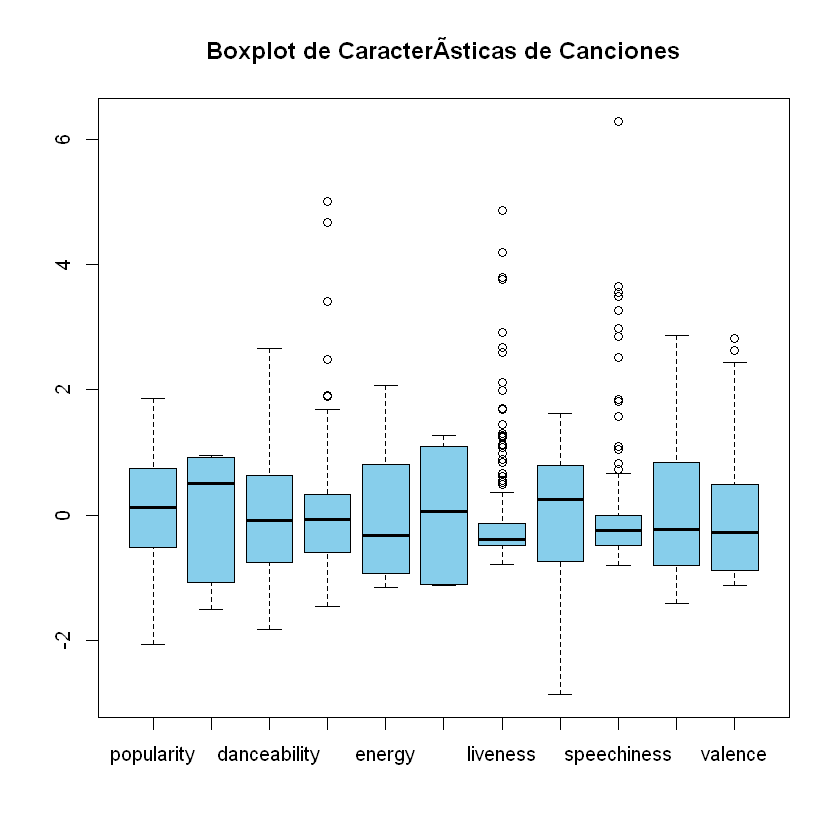

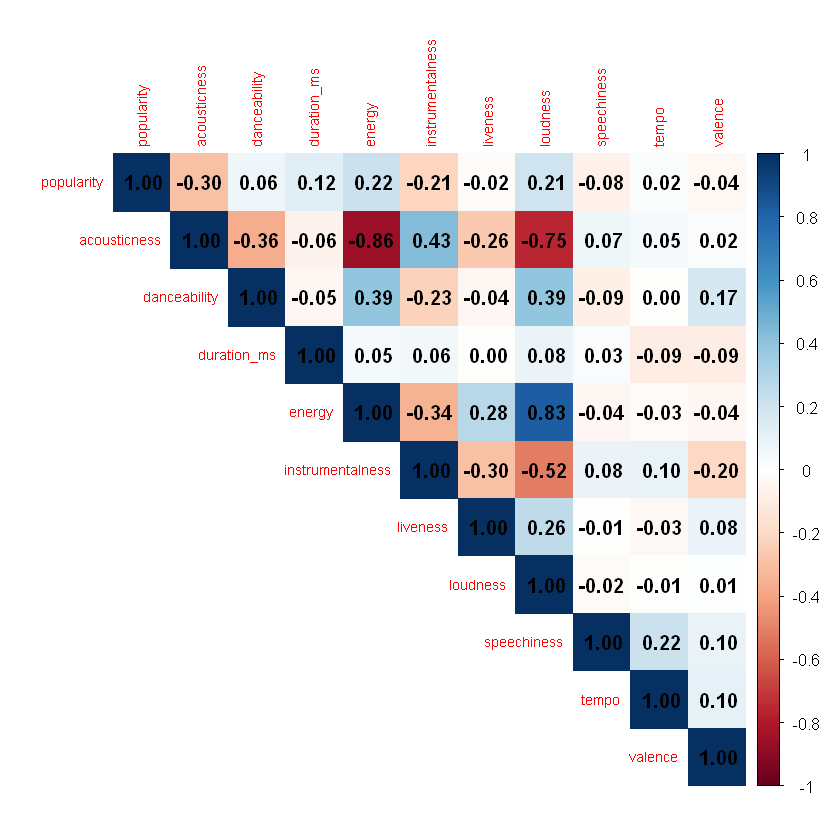

In [ ]:
#seleccionamos columnas 4:14
data_selected = datos[,4:14]

# Escalar datos
apply(data_selected, 2, var) #varianza
apply(data_selected, 2, mean) #promedio

data_selected =  apply(data_selected, 2, scale)
head(data_selected)
apply(data_selected, 2, var)
apply(data_selected, 2, mean)
# fin escalar datos

summary(data_selected)
boxplot(data_selected, col = "skyblue", main = "Boxplot de Caracteristicas de Canciones")
matrix_cor = cor(data_selected)

corrplot(matrix_cor, method='color', type='upper', addCoef.col='black', tl.cex=0.7)

ii) Interprete sus resultados en (i). Indique cual es el interés de utilizar PCA en este conjunto de datos y si se sugiere algún tipo de limpieza de datos a partir del análisis realizado.